In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
df1 = pd.read_csv("diabetes_binary_health_indicators.csv")
df2 = pd.read_csv("C:/Users/cheta/Downloads/heart_2020_cleaned.csv")

In [3]:
print(df1.head())
print(df1.info())
print(df1.describe())

print(df2.head())
print(df2.info())
print(df2.describe())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

In [4]:
# checking missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [5]:
# Handle Missing Values
# Both datasets are reported to have no missing values.

# Schema matching
# Renaming columns 
df1.rename(columns={'HvyAlcoholConsump':'AlcoholDrinking', 'Diabetes_binary': 'Diabetic', 'HeartDiseaseorAttack': 'HeartDisease'}, inplace=True)
df2.rename(columns={'AgeCategory': 'Age', 'Smoking': 'Smoker', 'PhysicalHealth': 'PhysHlth', 'MentalHealth': 'MentHlth', 'GenHealth': 'GenHlth', 'DiffWalking': 'DiffWalk', 'PhysicalActivity': 'PhysActivity'}, inplace=True)


In [6]:
# Convert Data Types
# Convert binary variables to int (if not already)
# List of columns to convert to int
columns_to_convert_df1= df1.columns
columns_to_convert_df2=['BMI']
# Convert each column in the list to int
df1[columns_to_convert_df1] = df1[columns_to_convert_df1].astype(int)
df2[columns_to_convert_df2] = df2[columns_to_convert_df2].astype(int)



In [7]:
# # for df2 encode categorical variables
# for column in yes_no_columns:
#     df2[column] = df2[column].map({'Yes': 1, 'No': 0})

df2['Diabetic'] = df2['Diabetic'].replace({'No, borderline diabetes': 'No'})
df2['Diabetic'] = df2['Diabetic'].replace({'Yes (during pregnancy)': 'Yes'})


In [8]:
yes_no_columns = ['HeartDisease','Smoker', 'AlcoholDrinking', 'Stroke', 'DiffWalk', 'Diabetic', 'PhysActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Automatically convert all columns with "Yes" and "No" values
for column in df2.columns:
    if set(df2[column].unique()) == {'Yes', 'No'}:
        df2[column] = df2[column].map({'Yes': 1, 'No': 0})

# Convert GenHlth to integers (poor/fair/good/very good/excellent -> 5/4/3/2/1)
gen_health_mapping = {'Poor': 5, 'Fair': 4, 'Good': 3, 'Very good': 2, 'Excellent': 1}
df2['GenHlth'] = df2['GenHlth'].map(gen_health_mapping)

# Convert Sex to integers (0=female, 1=male)
df2['Sex'] = df2['Sex'].map({'Female': 0, 'Male': 1})


In [9]:
# Function to calculate the mean of age ranges
def mean_of_range(age_range):
    if age_range == '80 or older':
        # Assuming 85 as the upper limit for the '80 or older' category
        return 82.5
    else:
        # Split the range into a list of the lower and upper bounds, convert to integers, and calculate the mean
        lower, upper = map(int, age_range.split('-'))
        return (lower + upper) / 2

# Apply the function to the Age column
df2['Age'] = df2['Age'].apply(mean_of_range)

In [10]:

# # List of numerical columns to standardize (adjust as needed)
# numerical_cols_df1 = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']
# numerical_cols_df2 = ['BMI', 'GenHlth', 'PhysHlth', 'MentHlth', 'Age']  # Assuming GenHlth is not available

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Standardize df1
# df1[numerical_cols_df1] = scaler.fit_transform(df1[numerical_cols_df1])

# # Standardize df2 - Reinitialize the scaler to avoid data leakage between df1 and df2
# scaler = StandardScaler()
# df2[numerical_cols_df2] = scaler.fit_transform(df2[numerical_cols_df2])


In [11]:
# Feature Selection
columns_to_drop_df1 = ['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income']  # Replace 'Column1', 'Column2', etc. with actual column names from df1
columns_to_drop_df2 = ['Race', 'KidneyDisease', 'SkinCancer']  # Replace 'Column3', 'Column4', etc. with actual column names from df2

# Drop the specified columns from df1
df1 = df1.drop(columns=columns_to_drop_df1)

# Drop the specified columns from df2
df2 = df2.drop(columns=columns_to_drop_df2)

# Now df1 and df2 have the unwanted columns removed


In [12]:
print(df1.head())
print(df2.head())

   Diabetic  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDisease  \
0         0       1         1          1   40       1       0             0   
1         0       0         0          0   25       1       0             0   
2         0       1         1          1   28       0       0             0   
3         0       1         0          1   27       0       0             0   
4         0       1         1          1   24       0       0             0   

   PhysActivity  Fruits  Veggies  AlcoholDrinking  GenHlth  MentHlth  \
0             0       0        1                0        5        18   
1             1       0        0                0        3         0   
2             0       1        0                0        5        30   
3             1       1        1                0        2         0   
4             1       1        1                0        2         3   

   PhysHlth  DiffWalk  Sex  Age  
0        15         1    0    9  
1         0         0   

In [13]:
# df1.to_csv('df1.csv', index=False)
# df2.to_csv('df2.csv', index=False)

In [14]:

# Assuming df1 and df2 are your DataFrames

# Align the columns in df1 and df2 so they are in the same order
common_cols = ['Diabetic', 'HeartDisease', 'BMI', 'Sex', 'Age', 'Smoker', 'AlcoholDrinking', 'Stroke', 'PhysHlth', 
               'MentHlth', 'GenHlth', 'DiffWalk',  'PhysActivity']
unique_cols_df1 = [col for col in df1.columns if col not in common_cols]
unique_cols_df2 = [col for col in df2.columns if col not in common_cols]

# Reorder df1 and df2 to have common columns first, then unique columns
df1_reordered = df1[common_cols + unique_cols_df1]
df2_reordered = df2[common_cols + unique_cols_df2]

# Concatenate df1 and df2
merged_df = pd.concat([df1_reordered, df2_reordered], axis=0, ignore_index=True, sort=False)

print(merged_df.head())


   Diabetic  HeartDisease  BMI  Sex   Age  Smoker  AlcoholDrinking  Stroke  \
0         0             0   40    0   9.0       1                0       0   
1         0             0   25    0   7.0       1                0       0   
2         0             0   28    0   9.0       0                0       0   
3         0             0   27    0  11.0       0                0       0   
4         0             0   24    0  11.0       0                0       0   

   PhysHlth  MentHlth  GenHlth  DiffWalk  PhysActivity  HighBP  HighChol  \
0      15.0      18.0        5         1             0     1.0       1.0   
1       0.0       0.0        3         0             1     0.0       0.0   
2      30.0      30.0        5         1             0     1.0       1.0   
3       0.0       0.0        2         0             1     1.0       0.0   
4       0.0       3.0        2         0             1     1.0       1.0   

   CholCheck  Fruits  Veggies  SleepTime  Asthma  
0        1.0     0.0   

In [15]:
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_dataset2.csv', index=False)

In [16]:
print(merged_df.columns)


Index(['Diabetic', 'HeartDisease', 'BMI', 'Sex', 'Age', 'Smoker',
       'AlcoholDrinking', 'Stroke', 'PhysHlth', 'MentHlth', 'GenHlth',
       'DiffWalk', 'PhysActivity', 'HighBP', 'HighChol', 'CholCheck', 'Fruits',
       'Veggies', 'SleepTime', 'Asthma'],
      dtype='object')


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming Diabetic and HeartDisease are already binary or have been encoded
# Add unique identifiers for patients and features
merged_df['patient_id'] = range(len(merged_df))

In [18]:
import torch
from torch_geometric.data import HeteroData
import pandas as pd

# Initialize your dictionaries mapping categories to indices here:
phys_categories = [1, 2, 3, 4, 5]  
ment_categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
gen_categories = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Create dictionaries to map each category value to a unique index
phys_to_node_index = {category: i for i, category in enumerate(phys_categories)}
ment_to_node_index = {category: i + len(phys_categories) for i, category in enumerate(ment_categories)}
gen_to_node_index = {category: i + len(phys_categories) + len(ment_categories) for i, category in enumerate(gen_categories)}

# Now you can proceed with the loop to add edges to the HeteroData object

# Initialize HeteroData
data = HeteroData()

# Add patient nodes with their non-categorical attributes
patient_features = torch.tensor(merged_df[['BMI','Sex', 'Age', 'Smoker', 'AlcoholDrinking', 'Stroke', "DiffWalk", 'PhysActivity', 'HighBP', 'HighChol', 'CholCheck', 'Fruits', 'Veggies']].values, dtype=torch.float)
data['patient_node'].x = patient_features
# Assuming merged_df is your DataFrame and it's already preprocessed
# Initialize the edge_index lists
edge_index_phys_hlth = [[], []]  # Source (patient) nodes, target (phys_hlth) nodes
edge_index_ment_hlth = [[], []]  # Source (patient) nodes, target (ment_hlth) nodes
edge_index_gen_hlth = [[], []]   # Source (patient) nodes, target (gen_hlth) nodes

# The rest of your code for adding features to HeteroData and defining node mappings...

for index, row in merged_df.iterrows():
    patient_id = index  # Assuming the index can serve as a unique identifier
    
    # Get the unique node index for each health indicator category
    phys_node_index = phys_to_node_index.get(row['PhysHlth'], None)
    ment_node_index = ment_to_node_index.get(row['MentHlth'], None)
    gen_node_index = gen_to_node_index.get(row['GenHlth'], None)

    # Append edge connections to initialized lists
    if phys_node_index is not None:
        edge_index_phys_hlth[0].append(patient_id)
        edge_index_phys_hlth[1].append(phys_node_index)
    if ment_node_index is not None:
        edge_index_ment_hlth[0].append(patient_id)
        edge_index_ment_hlth[1].append(ment_node_index)
    if gen_node_index is not None:
        edge_index_gen_hlth[0].append(patient_id)
        edge_index_gen_hlth[1].append(gen_node_index)

# For simplicity, let's assume you've already mapped each unique category for health indicators to a unique integer

# Convert lists to PyTorch tensors for adding to the graph data
# Assuming you have a way to translate BMI, PhysHlth, MentHlth, and GenHlth values to unique node indices
# This could be a dictionary mapping from the category value to a unique index for each category


# Initializing edge indices
# Hypothetical categories for demonstration purposes

for index, row in merged_df.iterrows():
    patient_id = index  # Assuming the index can serve as a unique identifier
    # Get the unique node index for each health indicator category
    phys_node_index = phys_to_node_index.get(row['PhysHlth'])
    ment_node_index = ment_to_node_index.get(row['MentHlth'])
    gen_node_index = gen_to_node_index.get(row['GenHlth'])

    # Append edge connections
    if phys_node_index is not None:
        edge_index_phys_hlth[0].append(patient_id)
        edge_index_phys_hlth[1].append(phys_node_index)
    if ment_node_index is not None:
        edge_index_ment_hlth[0].append(patient_id)
        edge_index_ment_hlth[1].append(ment_node_index)
    if gen_node_index is not None:
        edge_index_gen_hlth[0].append(patient_id)
        edge_index_gen_hlth[1].append(gen_node_index)

data['patient_node', 'has_phys_hlth', 'phys_hlth_node'].edge_index = torch.tensor(edge_index_phys_hlth, dtype=torch.long)
data['patient_node', 'has_ment_hlth', 'ment_hlth_node'].edge_index = torch.tensor(edge_index_ment_hlth, dtype=torch.long)
data['patient_node', 'has_gen_hlth', 'gen_hlth_node'].edge_index = torch.tensor(edge_index_gen_hlth, dtype=torch.long)
# Prepare labels
# Assuming 'Diabetic' and 'HeartDisease' are binary labels in your DataFrame
labels = torch.tensor(merged_df[['Diabetic', 'HeartDisease']].values, dtype=torch.float)
data['patient_node'].y = labels

print(data)

HeteroData(
  patient_node={
    x=[573475, 13],
    y=[573475, 2],
  },
  (patient_node, has_phys_hlth, phys_hlth_node)={ edge_index=[2, 185742] },
  (patient_node, has_ment_hlth, ment_hlth_node)={ edge_index=[2, 384788] },
  (patient_node, has_gen_hlth, gen_hlth_node)={ edge_index=[2, 1146950] }
)


In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes with the node type as a node attribute
for i in range(len(data['patient_node'].x)):
    G.add_node(f'Patient_{i}', type='patient')

for i, cat in enumerate(phys_categories + ment_categories + gen_categories, start=1):
    G.add_node(f'Feature_{i}', type='feature')

# Add edges between patients and features based on the edge_index tensors
for src, dest in zip(data['patient_node', 'has_phys_hlth', 'phys_hlth_node'].edge_index[0], data['patient_node', 'has_phys_hlth', 'phys_hlth_node'].edge_index[1]):
    G.add_edge(f'Patient_{src.item()}', f'Feature_{dest.item()}')

for src, dest in zip(data['patient_node', 'has_ment_hlth', 'ment_hlth_node'].edge_index[0], data['patient_node', 'has_ment_hlth', 'ment_hlth_node'].edge_index[1]):
    G.add_edge(f'Patient_{src.item()}', f'Feature_{dest.item()}')

for src, dest in zip(data['patient_node', 'has_gen_hlth', 'gen_hlth_node'].edge_index[0], data['patient_node', 'has_gen_hlth', 'gen_hlth_node'].edge_index[1]):
    G.add_edge(f'Patient_{src.item()}', f'Feature_{dest.item()}')

# Visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positions for all nodes.

# Draw nodes by type
patient_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'patient']
feature_nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'feature']

nx.draw_networkx_nodes(G, pos, nodelist=patient_nodes, node_color='skyblue', label='Patients')
nx.draw_networkx_nodes(G, pos, nodelist=feature_nodes, node_color='lightgreen', label='Features')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.legend(scatterpoints=1)
plt.show()




KeyboardInterrupt



<Figure size 1200x1200 with 0 Axes>

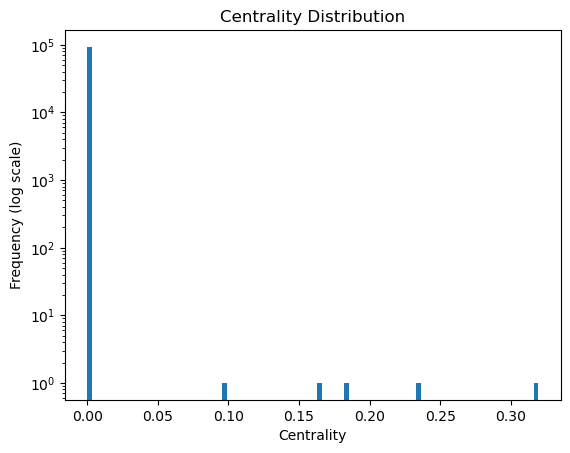

In [34]:
import networkx as nx

# Convert a PyG edge_index to a NetworkX graph to calculate centrality
# Here we focus on a simplified example; adapt as necessary for your full graph
def convert_to_networkx(edge_index):
    G = nx.Graph()
    edge_list = edge_index.t().numpy().tolist()
    G.add_edges_from(edge_list)
    return G

G = convert_to_networkx(data['patient_node', 'has_phys_hlth', 'phys_hlth_node'].edge_index)

# Calculate and plot centrality for a subset due to computational constraints
centrality = nx.degree_centrality(G)
plt.hist(list(centrality.values()), bins=100, log=True)
plt.title("Centrality Distribution")
plt.xlabel("Centrality")
plt.ylabel("Frequency (log scale)")
plt.show()


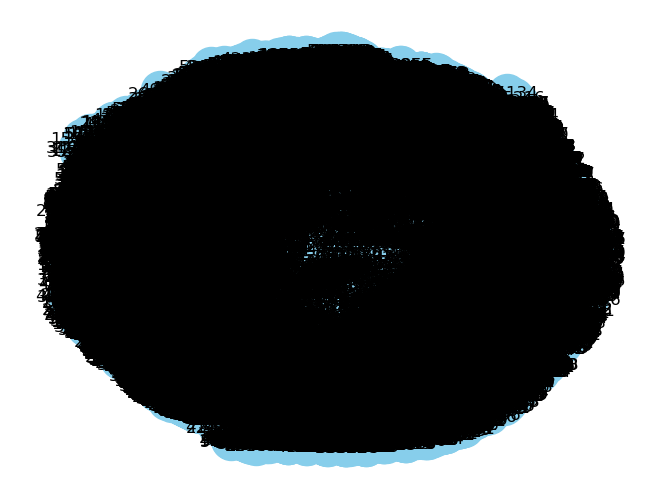

In [37]:
def visualize_subgraph(G, node, radius=1):
    # Generate a subgraph centered around a specific node
    sg = nx.ego_graph(G, node, radius=radius)
    pos = nx.spring_layout(sg)
    nx.draw(sg, pos, with_labels=True, no21111111111111111111111111111111de_color='skyblue', node_size=750, edge_color='k')
    plt.show()

# Example visualization around a 'patient_node'
visualize_subgraph(G, 0)  # '0' is a placeholder; replace with an actual node identifier


In [38]:
import torch
from torch_geometric.data import HeteroData, DataLoader
from torch_geometric.nn import RGCNConv, global_mean_pool
import torch.nn.functional as F

class RGCN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes, num_relations):
        super(RGCN, self).__init__()
        self.conv1 = RGCNConv(num_node_features, 64, num_relations)
        self.conv2 = RGCNConv(64, 64, num_relations)
        self.out = torch.nn.Linear(64, num_classes)

    def forward(self, x, edge_index, edge_type, batch=None):
        x = F.relu(self.conv1(x, edge_index, edge_type))
        x = F.relu(self.conv2(x, edge_index, edge_type))
        if batch is not None:
            x = global_mean_pool(x, batch)
        x = F.dropout(x, p=0.2, training=self.training)
        return self.out(x)

# Initialize model
model = RGCN(num_node_features=12, num_classes=2, num_relations=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Assuming `data` is properly initialized HeteroData object
data_list = [data]  # Single-element list if you have one graph
loader = DataLoader(data_list, batch_size=1, shuffle=False)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        # Adjust the model's forward method to handle hetero_data correctly
        out = model(batch.x_dict['patient_node'], batch.edge_index_dict[('patient_node', 'relation_type', 'other_node_type')], batch.edge_type_dict['relation_type'])
        loss = F.cross_entropy(out, batch.y_dict['patient_node'])
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}')

# Ensure edge_index and other properties are correctly initialized
print(data)


RuntimeError: Could not infer dtype of NoneType